# PTEN in Endo and GBM

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u

import sys
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsDontMatter\\')
#import cis_functions as f
import plot_utils as p


In [2]:
gbm = cptac.Gbm()
endo = cptac.Endometrial()

In [3]:
cancer1 = "GBM"
cancer2 = "Endometrial"
gene = 'PTEN'

In [4]:
#GBM ttest
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot = gbm.get_proteomics()
prot_list = list(prot.columns)
prot_and_mutations = gbm.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = prot_list)  

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 82 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 6)


In [5]:
col_list = list(mut_status.columns)
col_list.remove('binary_mutations')

print("Doing t-test comparisons for GBM\n")

# Call wrap_ttest, pass in formatted dataframe
wrap_results = u.wrap_ttest(mut_status, 'binary_mutations', col_list, return_all=True)

Doing t-test comparisons for GBM



C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


No significant comparisons.


In [6]:
wrap_results.loc[wrap_results['Comparison'] == gene+"_proteomics"]

,Comparison,P_Value
0,PTEN_proteomics,0.000032


In [7]:
# endo ttest
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot2 = endo.get_proteomics()
prot_list2 = list(prot2.columns)
prot_and_mutations = endo.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = prot_list2)  

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status2 = mut_status.dropna(axis=1,how='all')

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 69 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 6)


In [8]:
col_list2 = list(mut_status2.columns)
col_list2.remove('binary_mutations')

print("Doing t-test comparisons for Endometrial")

# Call wrap_ttest, pass in formatted dataframe
wrap_results2 = u.wrap_ttest(mut_status2, 'binary_mutations', col_list2, return_all=True)

Doing t-test comparisons for Endometrial
78 significant comparisons!


In [9]:
wrap_results2.loc[wrap_results2['Comparison'] == gene+"_proteomics"]

,Comparison,P_Value
7303,PTEN_proteomics,0.018255


In [10]:
#combine pval results
combined = wrap_results.merge(wrap_results2, on='Comparison')
combined = combined.replace(regex=True,to_replace='_proteomics', value='')

In [11]:
# Green = interacting protein
interacting_list = u.get_interacting_proteins(gene)
combined["color"] = np.where(combined["Comparison"].isin(interacting_list), "red", "lightblue")
print(interacting_list)
#combined.loc[combined['color'] == 'red']
both_values_df = combined.dropna(axis=0, how='any') # only keep rows with both data points
both_values_df

['MDM2', 'CSNK2A1', 'PDGFRB', 'PIK3R2', 'PIK3C3', 'CSNK2A2', 'SLC9A3R1', 'PIK3R3', 'USP13', 'PIK3CA', 'TP53', 'EGFR', 'PIK3CB', 'PTK2', 'USP7', 'XIAP', 'PTEN', 'PREX2', 'MAST2', 'PIK3CD', 'ROCK1', 'SHC1', 'NEDD4', 'INPP4B', 'PIK3R1', 'AKT1', 'MVP', 'MAGI3']


,Comparison,P_Value_x,P_Value_y,color
0,PTEN,0.000032,0.018255,red
1,CALD1,0.000227,0.831139,lightblue
2,FLNC,0.000240,0.987449,lightblue
3,ERBB2,0.000491,0.000164,lightblue
4,MAPK8IP3,0.000499,0.000446,lightblue
...,...,...,...,...
9792,METTL26,0.997759,0.049312,lightblue
9793,ZNF207,0.998493,0.406304,lightblue
9794,POLB,0.999058,0.050598,lightblue
9795,TIMM21,0.999198,0.182861,lightblue


Visualize all P-values

In [11]:
pathways = pd.read_excel(R"E:\Users\brittany henderson\Documents\Junior BYU\WikiPathwaysData.xlsx")


In [ ]:
#combine pval results
combined_2 = wrap_results.merge(wrap_results2, on='Comparison')
combined_df = combined_2.replace(regex=True,to_replace='_proteomics', value='')
combined_df

In [ ]:
c_path = combined_df.merge(pathways, left_on='Comparison', right_on='Gene')
#c_path = c_path.rename(columns={'P_Value_x':'Gbm P-Values', 'P_Value_y': 'En P-Values',
#               'Focal Adhesion-PI3K-Akt-mTOR-signaling pathway' : 'Focal Adhesion'})
c_path


In [ ]:
g = sns.FacetGrid(c_path, hue='Focal Adhesion')# col and row of the multiple grids , hue = pathway
g.map(sns.scatterplot, "P_Value_x", "P_Value_y").set(
    xscale = 'log').set(yscale = 'log')
g.map(sns.scatterplot, "P_Value_x", "P_Value_y").set(
    xscale = 'log').set(yscale = 'log')
plt.xlim(1e-5, 1e0) # 0.00005 to 1
plt.ylim(1e-5, 1e0)
g.add_legend()


In [26]:
f = pathways[['Gene','Focal Adhesion-PI3K-Akt-mTOR-signaling pathway']]#'PDGF Pathway','NRF2-ARE regulation','Vitamin D Receptor Pathway', 'Serotonin Transporter Activity']]
f

,Gene,Focal Adhesion-PI3K-Akt-mTOR-signaling pathway
0,BAIAP2,False
1,CD4,False
2,GADS,False
3,FMR1,False
4,CCDC36,False
...,...,...
6157,ARR3,False
6158,GUCY1B2,False
6159,MAPK6,False
6160,CHST5,False


In [86]:
'''
@Param df1:
     Dataframe of p-values for the first cancer (x-axis). 
     The first column must include the trans gene name. 
@Param df1_name:
    String. Name of the x-axis. Include the first cancer name. 

@Param df2:
    Dataframe of p-values for the second cancer (y-axis).
    The first column must include the trans gene name. 
    
@Param df2_name:
    String. Name of the y-axis. Include the second cancer name.

@Param cat_df:
    Dataframe of Booleans. First column must be gene names. 
    Can include up to 5 additional columns. Each column represents 
    a certain pathway or group of genes specified with boolean 
    variables (True is in the group). Each group will become another 
    plot graphing the p-values of the genes in that group.
    
@Param save_file_name:
    String. Optional to save the figure. The name of the file to 
    save the figure to.

This function plots the p-values for two cancers where 
x = cancer1_pvals and y = cancer2_pvals.  

The wrap_ttest function will help with creating df1 and df2. 
Both dataframes must have the gene included in the first column 
(omics can be included) and the p-value. Wrap_ttest creates this 
needed dataframe when its parameter return_all = True. 

The cat_df dataframe alows for multiple plots of specific gene groups
to be included. The first plot will always be all genes followed by one 
plot for each column included in cat_df. It is optional to include cat_df.
The arrangement of the subplots follows in rows and columns: (1,2) for
two plots, (2,2) for four plots(2,3) for six plots. The first plot will
allways be the comprehensive p-values for all genes done in the t-test
comparisons for the two cancers.
'''

def binary_pval_plot(df1, df1_name, df2, df2_name, cat_df=None, save_file_name=None):
    # Step 1: Combine Dataframes
    combined = df1.merge(df2, on=df1.columns[0]) # merge 2 pval df
    combined = combined.replace(regex=True,to_replace='_proteomics', value='') # only gene names
    combined_df = combined.rename(columns={combined.columns[1]: df1_name+" p-values", 
                                              combined.columns[2]: df2_name+" p-values"}) # Rename for use with x and y-axis
    if cat_df is not None:
        combined_df = combined_df.merge(cat_df, left_on= combined_df.columns[0], right_on= cat_df.columns[0]) # merge pathways
    # Plots one plot if no cat_df provided
    else:
        plt.figure(figsize=(6, 6)) #size of plot
        all_pvals = sns.scatterplot(x=combined_df.columns[1], y=combined_df.columns[2], data=combined_df)
        all_pvals.set_title("Comprehensive "+df1_name+" and "+df2_name+ " P-Values")
        all_pvals.set_xscale('log')
        all_pvals.set_yscale('log')
        plt.xlim(1e-5, 1e0) # 0.00005 to 1
        plt.ylim(1e-5, 1e0)
        
        if save_file_name is not None:
            plt.savefig(save_file_name+'.png')
        plt.show()
        plt.clf()        
        plt.close()
        return 0

    # Step 2: Find number of plots needed (dimensions of array for subplots)
    paths = list(cat_df.columns[1:])
    total = len(paths) + 1
    two_plots = False
    if total == 2:
        m_row = 1
        m_col = 2
        two_plots = True
    elif total <= 4:
        m_row = 2
        m_col = 2 
    elif total <= 6:
        m_row = 2
        m_col = 3
    else:
        print("Two many columns in cat_df. Can only plot 5 pathways/groups. (6 total plots)")
        return 1
        
    
    fig, axes = plt.subplots(m_row, m_col, sharex=True, sharey=True) # share x -axis title
    plt.rcParams['figure.figsize']=(15, 10)
    
    #Step 3: Create Multiple Plots
    if two_plots == True:  ### needed because subplots dimensions are a 1D array, not 2D
        # First plot with all p-values
        #plt.rcParams['figure.figsize']=(15, 8) #size of plot
        ax = sns.scatterplot(x=combined_df.columns[1], y=combined_df.columns[2], data=combined_df,  
            ax=axes[0])
        ax.set_title("Comprehensive "+df1_name+" and "+df2_name+ " P-Values")
        ax.set_xscale('log')
        ax.set_yscale('log')
        plt.xlim(1e-5, 1e0) # 0.00005 to 1
        plt.ylim(1e-5, 1e0)
        # 1 Catagory plot
        group_name = str(combined_df.columns[4])
        only_p = combined_df.loc[combined_df[group_name] == True]
        ax = sns.scatterplot(x=combined_df.columns[1], y=combined_df.columns[2], data=only_p, color='orange',
            ax=axes[1]).set_title(group_name) #axes only has one number (1D array)

    else:
        # First plot with all p-values
        ax = sns.scatterplot(x=combined_df.columns[1], y=combined_df.columns[2], data=combined_df,  
            ax=axes[0,0])
        ax.set_title("Comprehensive "+df1_name+" and "+df2_name+ " P-Values")
        ax.set_xscale('log')
        ax.set_yscale('log')
        plt.xlim(1e-5, 1e0) # 0.00005 to 1
        plt.ylim(1e-5, 1e0)
        
        # Catagory plots
        i = 0
        j = 1
        for e in paths:
            only_p = combined_df.loc[combined_df[e] == True]
            ax = sns.scatterplot(x=combined_df.columns[1], y=combined_df.columns[2], data=only_p, color='orange',
                ax=axes[i, j]).set_title(e)
            # i and j used to set next plot in axes
            if i <= (m_row - 1) and j < (m_col - 1):
                j += 1
            elif j == (m_col - 1):
                i+=1
                j=0
    
    if save_file_name is not None:
        fig.savefig(save_file_name+'.png')
    plt.show()
    plt.clf()        
    plt.close()
    return 0


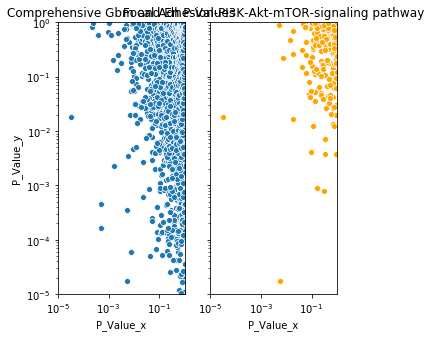

In [89]:
n = p.binary_pval_plot(wrap_results, "Gbm", wrap_results2, "En",f)
                     #,save_file_name= 'new')


In [33]:
# Format figure size and font
plt.rcParams['figure.figsize']=(15,10)
sns.set(font_scale = 1.3)

# Format title and axis
plot = sns.regplot(x="P_Value_x", y="P_Value_y", data=both_values_df,
                   scatter_kws={'facecolors':both_values_df['color']})
plot.set_title("P_Value Distribution for "+gene+" trans Proteomics")
plot.set(xlabel = 'P-Value for '+cancer1)
plot.set(ylabel = 'P-Value for '+cancer2)

plt.show()
plt.clf()
plt.close()

NameError: name 'both_values_df' is not defined

Zoom x-axis (low endometrial p-values)

In [ ]:
low_endo_pvals = both_values_df.loc[both_values_df['P_Value_y'] <= 0.05] #graph
low_endo_pvals = low_endo_pvals.loc[low_endo_pvals['P_Value_x'] >= 0.5]

# Format figure size and font
plt.rcParams['figure.figsize']=(15,10)
sns.set(font_scale = 1.3)

# Format title and axis
plot = sns.regplot(x="P_Value_x", y="P_Value_y", data=low_endo_pvals, 
                   scatter_kws={'facecolors':low_endo_pvals['color']})
plot.set_title("Low P_Value Distribution in Endometrial Only")
plot.set(xlabel = 'P-Value for '+cancer1)
plot.set(ylabel = 'P-Value for '+cancer2)

plt.show()
plt.clf()
plt.close()

Zoom y-axis (low gbm p-values)

In [ ]:
low_gbm_pvals = both_values_df.loc[both_values_df['P_Value_x'] <= 0.05]
low_gbm_pvals = low_gbm_pvals.loc[low_gbm_pvals['P_Value_y'] >= 0.5] #comment out to see all y

# Format figure size and font
plt.rcParams['figure.figsize']=(15,10)
sns.set(font_scale = 1.3)

# Format title and axis
plot = sns.regplot(x="P_Value_x", y="P_Value_y", data=low_gbm_pvals, scatter_kws={'facecolors':low_gbm_pvals['color']})
plot.set_title("Low P_Value Distribution for Gbm Only")
plot.set(xlabel = 'P-Value for '+cancer1)
plot.set(ylabel = 'P-Value for '+cancer2)

plt.show()
plt.clf()
plt.close()

# GSEA 

In [ ]:
# corners for gsea test for zoomed x-axis (0-1 range gbm pvals)
low = combined.loc[combined['P_Value_y'] <= 0.05]
low_left_corner = low.loc[low['P_Value_x'] <= 0.05] 
low_right_corner = low.loc[low['P_Value_x'] >= 0.5] 

print("Number of both low:", len(low_left_corner))
print("Number of low endo, high gbm:", len(low_right_corner))

# corners for gsea test for zoomed y-axis (0-1 range endo pvals)
high = combined.loc[combined['P_Value_y'] >= 0.5] 
high_left_corner = high.loc[high['P_Value_x'] <= 0.05] 
high_right_corner = high.loc[high['P_Value_x'] >= 0.5]  
print("Number of high endo, low gbm:", len(high_left_corner))
print("Number of both high:", len(high_right_corner))

In [ ]:
# gsea for lower left corner (both low pvals)
both_low_pvals = list(low_left_corner['Comparison'])
print("Number of genes for both low pvals:", len(both_low_pvals))

both_low_gsea = gp.enrichr(
    gene_list = both_low_pvals, description='Tumor_partition', gene_sets='KEGG_2016')

In [ ]:
both_low_gsea.res2d.head() # pip2 signaling? check phosphatidylinositol proteins!

In [ ]:
# gsea for low right corner (low endo, high gbm)
low_endo_high_gbm = list(low_right_corner['Comparison'])
print("Number of genes for low_endo_high_gbm:", len(low_endo_high_gbm))

low_endo_high_gbm_gsea = gp.enrichr(
    gene_list = low_endo_high_gbm, description='Tumor_partition', gene_sets='KEGG_2016')

In [ ]:
g = low_endo_high_gbm_gsea.res2d.head()
#list(g['Genes'])
g

Range 0-1 endo (upper corners)

In [ ]:
# gsea for high left corner (high endo, low gbm)
high_endo_low_gbm = list(high_left_corner['Comparison'])
print("Number of genes for high_endo_low_gbm:", len(high_endo_low_gbm))

high_endo_low_gbm_gsea = gp.enrichr(
    gene_list = high_endo_low_gbm, gene_sets='KEGG_2016')


In [ ]:
gbm = high_endo_low_gbm_gsea.res2d.head() # check focal adhesions, endocytosis pathways
gbm

In [ ]:
# gsea for high right corner (high endo, high gbm)
both_high = list(high_right_corner['Comparison'])
print("Number of genes for both_high:", len(both_high))

both_high_gsea = gp.enrichr(
    gene_list = both_high, description='Tumor_partition', gene_sets='KEGG_2016')

In [ ]:
both_high_gsea.res2d.head()

Pathways

In [ ]:
focal_adhesions_str = "ACTN1;BCL2;RAPGEF1;FLNA;FLNC;MYL9;IGF1R"
focal_adhesions = focal_adhesions_str.split(';')

combined["color"] = np.where(combined["Comparison"].isin(focal_adhesions), "purple", "lightblue")
print(focal_adhesions)
pathway_df = combined.dropna(axis=0, how='any') # only keep rows with both data points
pathway_df

In [ ]:
# Format figure size and font
plt.rcParams['figure.figsize']=(15,10)
sns.set(font_scale = 1.3)

# Format title and axis
plot = sns.regplot(x="P_Value_x", y="P_Value_y", data=pathway_df, 
                   scatter_kws={'facecolors':pathway_df['color']})
plot.set_title("P_Value Distribution showing Pathway")
plot.set(xlabel = 'P-Value for '+cancer1)
plot.set(ylabel = 'P-Value for '+cancer2)

plt.show()
plt.clf()
plt.close()